#PrL1: Programming assignment on potential flow

---



(10 points) Consider the potential flow comprising of the superposition of an array of 10
equal clockwise vortices of total strength 0.15 units (i.e., 0.015 units each) distributed
along a 1 unit-long line at an angle of −10◦
to an oncoming (left-to-right) uniform stream
of speed 1 unit.
Write a computer code to compute and plot the streamlines for this particular potential
flow. The code can be in any computer language of your choice.

We start by doing some basic imports like the numpy math system and a plotting library matplotlib .

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [7, 7]

We know that the 2D incompressible flow has the equation $\triangledown^2\phi=0$

Also each flow element has it's own $\phi$

- $\phi=Ux$ for uniform stream along x-axis
- $\phi=K\theta$ for Line irrotational vortex

But these 2 added will give a difficulty in plotting since one of the parameters is $\theta$ .

Since $\triangledown v =0 $ is also true , instead of superposing the stream function we can superpose the velocities since the velocity field for the Line Irrotational vortex is much simpler .


Lets now define the vortex velocity field(as a function) at origin (which we will shift multiple times to make the result)

Lets analytically define the velocity fields of the following elements:

- Free stream:
  - $V(x,y)=(U,0)$
- Line irrotational vortex
  - Since $V_\theta=\frac{-K}{r}$ and $V_r=0$ in cartesian coordinates , $V(x,y)=\bigg(\frac{ky}{\sqrt{x^2+y^2}},\frac{-kx}{\sqrt{x^2+y^2}}\bigg)$

In [ ]:
def vortexatorigin(x,y,k):
  #k is the strength of the field and this function returns a continuous field for a given input x and y
  if x==0 and y==0:
    return [0,0]
  vx=k*y/(x**2+y**2)
  vy=-k*x/(x**2+y**2)
  return np.array([vx,vy])

Similarly a x axis oriented free stream velocity field

In [ ]:
#free stream field 
def freestream(x,y,U):
  return [U,0]

Now that we have the flow elements we need , we need to make a function to automate plotting streamlines , and the function should take the following inputs.
- A handle to the above velocity vector field function.
- The initial point on the streamline (i.e., (x0, z0)).
- The step size along the streamline, ∆s.
- The rectangular bounding box of the figure (i.e., minimum and maximum
limits of x and z) where the streamlines should end.

So we define the following function with the inputs
 - starting point being $(x0,y0)$ .
 - the stepsize being $s$ .
 - the function to plot streamlines for being $F$ .
 - p is the number of iterations for the plot . 
 - a coordinate $(x,z)$ - limitmin to determine the bottom left coordinate of the rectangular box and a similar array limitmax for the top right of the box.

*Note that the last arguments limitmin and limitmax are optional arguments that need not be passed into the function when not required.

To start with making the function , make a simple forward integrator with the following steps :
- We start with the initial point P(x0,y0)
- We initialize 2 arrays , one for the x's and the other for the y's
- Now we find the velocity at P and then find its unit vector direction , store it in ux,uy
- Then we multiply that vector with the step size s and then add it to the original coordinate 
- We iterate this over the entire range of the iteration length until
  - it reaches a stagnation point(* discussed at the end of the document)
  - or it reaches the bound box




In [ ]:
def streamlineplotter(x0,y0,F,s,p,limitmin=[-5,-5],limitmax=[5,5]):
  xs=[]
  ys=[]
  xs.append(x0)
  ys.append(y0)
  xi=x0
  yi=y0
  for i in np.arange(p):
    ux=F(xi,yi)[0]
    uy=F(xi,yi)[1]
    if not (ux==0 and uy==0):
      uxh=ux/np.sqrt(ux**2+uy**2)
      uyh=uy/np.sqrt(ux**2+uy**2)
    else:
      uxh,uyh=[0,0]
    if xi>limitmax[0] or yi>limitmax[1] or xi<limitmin[0] or yi<limitmin[1]:
      break
    xi,yi=xi+uxh*s,yi+uyh*s
    xs.append(xi)
    ys.append(yi)
  return xs,ys

Now that we have our streamlineplotter , which returns the points to be plotted , lets test it on a unit freestream and a point vortex at origin which are superposed .

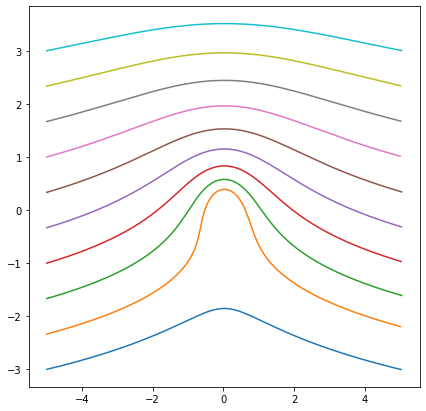

In [ ]:
def F(x,y):
  return np.array(vortexatorigin(x,y,1))+np.array(freestream(x,y,1))
for i in np.linspace(-3,3,10):
  xs,ys=streamlineplotter(-5,i,F,0.05,1000)
  plt.plot(xs,ys)

Now that the above results are relevant , we proceed by plotting the main problem . For this , we iterate over the line inclined 10 degrees to +x axis towards +z axis .

In [ ]:
#now we follow the problem statement 
def Ffinal(x,y):
  v=np.array([0,0])
  for i in np.linspace(1,2,10):
    theta=(np.pi/180)*10
    xv=i*np.cos(theta)
    yv=1+i*np.sin(theta)
#now we shift the vortexatorigin function to the line multiple times
    v=v+vortexatorigin(x-xv,y-yv,0.015)
  v=v+freestream(x,y,1)
  return v

Hence the final function is made and the stream is plotted for a nice square boundary from (0,0) to (3,3) . Also multiple streamlines are plotted with equal distances farstream. Optionally the line vortices are also marked in the figure using a scatter plot function 

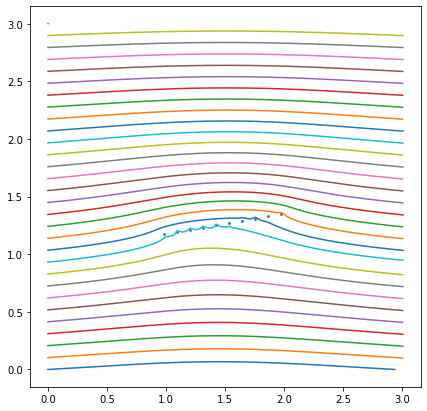

In [ ]:
for i in np.linspace(0,3,30):
  xs,ys=streamlineplotter(0,i,Ffinal,0.005,10000,[0,0],[3,3])
  plt.plot(xs,ys)
xs=[]
ys=[]
for i in np.linspace(1,2,10):
    theta=(np.pi/180)*10
    xv=i*np.cos(theta)
    yv=1+i*np.sin(theta)
    xs.append(xv)
    ys.append(yv)
plt.scatter(xs, ys, marker="o",s=3);

Major issues with this code :
- The code is too slow due to various procedures like :
  - At the streamline function generator the issue for stagnation points is not addressed , the program it runs even after it reaches the stagnation point until the iteration length is complete , it's that all those points overlap and are seen as only one point in the final graph.
  - Since all the stagnation points are stored repeatedly , there is also a memory wastage 
  - The plt.plot function is also called multiple times , increasing the time again

All of these can be sorted by just making a new library of functions for all the routines that im doing here and following some neat data structures ( which i never learnt) 